## Import dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, StandardScaler as std, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('data/avocado.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
print(df.shape)
df.head()


(18249, 13)


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


### General Description about the dataset

This dataset contains the information about the avocado prices and the total volume sold in the United States. The data is collected from the year 2015 to 2018. The dataset contains the following columns:

Date - The date of the observation  (date)
AveragePrice - the average price of a single avocado  
type - conventional or organic  (string)
year - the year  
Region - the city or region of the observation (string)
Total Volume - Total number of avocados sold  
4046 - Total number of avocados with PLU 4046 sold (plu stands for price look up which determines the size of the avocado)  
4225 - Total number of avocados with PLU 4225 sold  
4770 - Total number of avocados with PLU 4770 sold  
Total Bags - Total number of bags sold  
Small Bags - Total number of small bags sold  
Large Bags - Total number of large bags sold  
XLarge Bags - Total number of XLarge bags sold  

In [ ]:
# find rows with nan
print(df.isna().any(axis=1).sum())
df.corr()

0


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


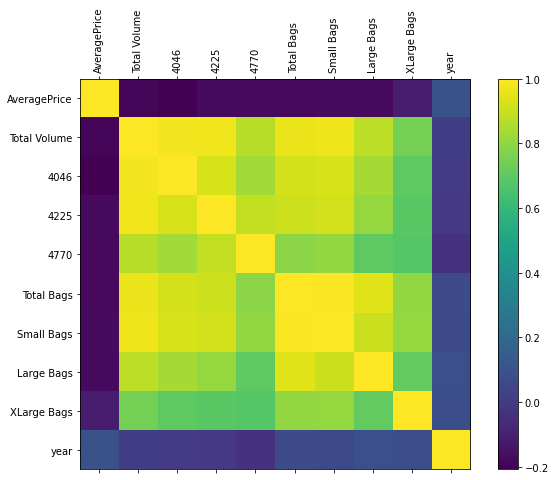

In [ ]:
#There is no null value in the dataset, hence imputation is not needed
def corr_heatmap(df):
  corr=df.corr() #figsize=(width,height)
  plt.figure(figsize=(10,7))
  caxes = plt.matshow(corr, fignum=1)
  # axes.set_xticks(labels=df.columns)
  plt.xticks(range(len(corr.columns)),corr.columns,rotation=90)
  plt.yticks(range(len(corr.columns)),corr.columns)
  plt.colorbar(caxes)
  plt.show()

corr_heatmap(df)

We could see that Average price and Year are negatively correlated with all other columns in the dataset


In [ ]:
features = ['Date','Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags',"type","year","region"]
X = df[features]
Y = df ["AveragePrice"]

In [ ]:
X.head()

,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### Convertin the date column to datetime format

In [ ]:
X["Date"] = pd.to_datetime(X["Date"])
#remove date and concat month and day and year as an int
X["Day-Month-Year"] = X["Date"].dt.year * 10000 + X["Date"].dt.month * 100 + X["Date"].dt.day
X.drop(["Date"], axis=1, inplace=True)
X.drop("year", axis=1, inplace=True)

<ipython-input-9-0ea57abb7aac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Date"] = pd.to_datetime(X["Date"])


In [ ]:
X.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Day-Month-Year
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,20151227
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,20151220
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,20151213
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,20151206
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,20151129


## Correlation Matrix

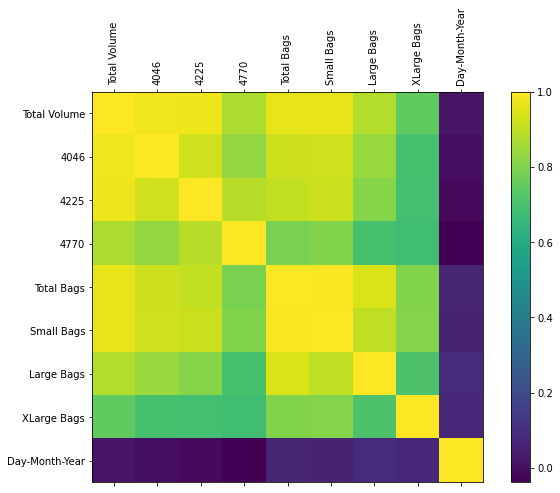

In [ ]:
corr_heatmap(X)

We can see there are some highly correlated features, so its better to drop them before training the model. We can see that Total Volume is highly correlated with 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags. So we can drop all these columns except Total Volume and we already drop the Date column as it is not useful for our problem.

In [ ]:
X.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Day-Month-Year
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,20151227
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,20151220
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,20151213
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,20151206
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,20151129


In [ ]:
le = LabelEncoder()
X_le = X.copy()
X_le["type"]= le.fit_transform(X["type"])
X_le["region"] = le.fit_transform(X["region"])


In [ ]:
X_ct.columns

Index(['type_conventional', 'type_organic', 'region_Albany', 'region_Atlanta',
       'region_BaltimoreWashington', 'region_Boise', 'region_Boston',
       'region_BuffaloRochester', 'region_California', 'region_Charlotte',
       'region_Chicago', 'region_CincinnatiDayton', 'region_Columbus',
       'region_DallasFtWorth', 'region_Denver', 'region_Detroit',
       'region_GrandRapids', 'region_GreatLakes', 'region_HarrisburgScranton',
       'region_HartfordSpringfield', 'region_Houston', 'region_Indianapolis',
       'region_Jacksonville', 'region_LasVegas', 'region_LosAngeles',
       'region_Louisville', 'region_MiamiFtLauderdale', 'region_Midsouth',
       'region_Nashville', 'region_NewOrleansMobile', 'region_NewYork',
       'region_Northeast', 'region_NorthernNewEngland', 'region_Orlando',
       'region_Philadelphia', 'region_PhoenixTucson', 'region_Pittsburgh',
       'region_Plains', 'region_Portland', 'region_RaleighGreensboro',
       'region_RichmondNorfolk', 'region_Roan

In [ ]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[8,9])],remainder='passthrough')
X_ct=pd.DataFrame(ct.fit_transform(X).toarray())

enc_col_names = ct.named_transformers_["encoder"].get_feature_names_out()
col_names = list(enc_col_names) + list(X.columns.drop(X.columns[[8,9]]))
X_ct.columns = col_names


print(X_ct.shape,X.shape)


(18249, 65) (18249, 11)


In [ ]:
X_ct.head()

,type_conventional,type_organic,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,...,region_WestTexNewMexico,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Day-Month-Year
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,20151227.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,20151220.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,20151213.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,20151206.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,20151129.0


In [ ]:
"region" in X_ct.columns

False

## Correlation Matrix after encoding

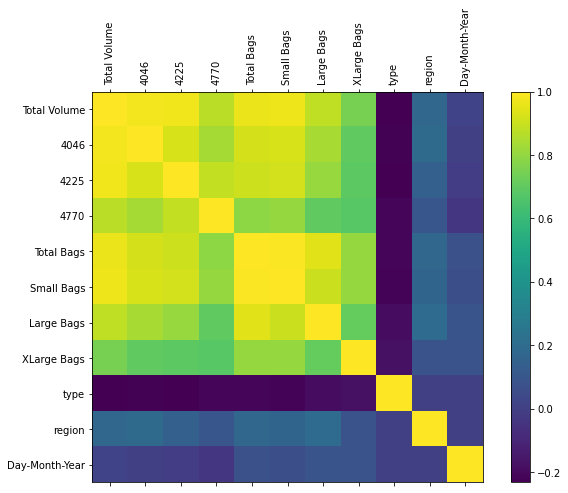

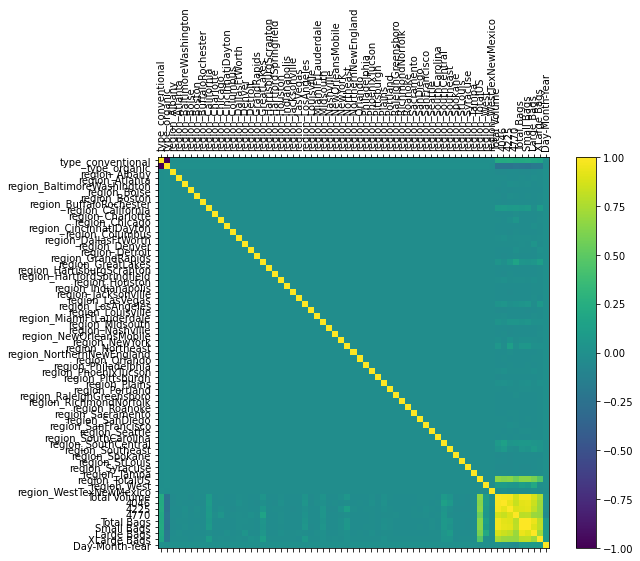

In [ ]:
corr_heatmap(X_le)
corr_heatmap(X_ct)


## Normalizing Values

In [ ]:
X_ct.describe().T

,count,mean,std,min,25%,50%,75%,max
type_conventional,18249.0,5.000822e-01,0.500014,0.0,0.00,1.00,1.00,1.00
type_organic,18249.0,4.999178e-01,0.500014,0.0,0.00,0.00,1.00,1.00
region_Albany,18249.0,1.852156e-02,0.134831,0.0,0.00,0.00,0.00,1.00
region_Atlanta,18249.0,1.852156e-02,0.134831,0.0,0.00,0.00,0.00,1.00
region_BaltimoreWashington,18249.0,1.852156e-02,0.134831,0.0,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...
Total Bags,18249.0,2.396392e+05,986242.399216,0.0,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,1.821947e+05,746178.514962,0.0,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,5.433809e+04,243965.964547,0.0,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3.106427e+03,17692.894652,0.0,0.00,0.00,132.50,551693.65


In [ ]:
norm = Normalizer()
X_norm = norm.fit_transform(X_ct)
X_norm = pd.DataFrame(X_norm, columns=X_ct.columns)

In [ ]:
X_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
type_conventional,18249.0,2.441162e-08,2.454576e-08,0.000000,0.000000,1.348156e-08,4.957117e-08,4.962737e-08
type_organic,18249.0,2.479378e-08,2.479854e-08,0.000000,0.000000,0.000000e+00,4.960089e-08,4.962754e-08
region_Albany,18249.0,9.186231e-10,6.687301e-09,0.000000,0.000000,0.000000e+00,0.000000e+00,4.962754e-08
region_Atlanta,18249.0,9.183930e-10,6.685626e-09,0.000000,0.000000,0.000000e+00,0.000000e+00,4.962753e-08
region_BaltimoreWashington,18249.0,9.180988e-10,6.683486e-09,0.000000,0.000000,0.000000e+00,0.000000e+00,4.962750e-08
...,...,...,...,...,...,...,...,...
Total Bags,18249.0,9.347362e-03,2.590367e-02,0.000000,0.000252,1.971919e-03,5.490987e-03,2.997703e-01
Small Bags,18249.0,7.106806e-03,1.972567e-02,0.000000,0.000141,1.306955e-03,4.131748e-03,2.260473e-01
Large Bags,18249.0,2.121568e-03,7.003218e-03,0.000000,0.000006,1.313308e-04,1.087186e-03,1.194148e-01
XLarge Bags,18249.0,1.189885e-04,5.115153e-04,0.000000,0.000000,0.000000e+00,6.555170e-06,1.081970e-02


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.2, random_state=0)

# Trying with linear regression


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)
predstrain = model.predict(X_train)
predstest=model.predict(X_test)
print("MAE: ",mean_absolute_error(Y_train,predstrain))
print("MAE: ",mean_absolute_error(Y_test,predstest))


MAE:  0.19847749663607717
MAE:  0.2022546692432356


In [ ]:
print(predstest,Y_test)

[1.53379288 1.03401665 1.53757244 ... 1.11533908 1.66262911 1.71356413] 9181     1.48
1013     1.05
14625    1.27
15234    2.15
18247    1.93
         ... 
10657    2.07
17490    1.41
6634     1.76
10947    1.69
13532    1.61
Name: AveragePrice, Length: 3650, dtype: float64


In [ ]:
Y_test.describe()

count    3650.000000
mean        1.416033
std         0.403647
min         0.510000
25%         1.110000
50%         1.390000
75%         1.680000
max         2.960000
Name: AveragePrice, dtype: float64

## Combinging X and Y to a DF

In [ ]:
X_norm["AveragePrice"] = Y
X_norm.head()

,type_conventional,type_organic,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,...,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Day-Month-Year,AveragePrice
0,4.962433e-08,0.0,4.962433e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003188,0.000051,0.002702,0.000002,0.000432,0.000427,0.000005,0.0,0.999991,1.33
1,4.962447e-08,0.0,4.962447e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.002723,0.000033,0.002215,0.000003,0.000472,0.000467,0.000005,0.0,0.999994,1.35
2,4.962321e-08,0.0,4.962321e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.005866,0.000039,0.005416,0.000006,0.000404,0.000399,0.000005,0.0,0.999968,0.93
3,4.962412e-08,0.0,4.962412e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003920,0.000056,0.003572,0.000004,0.000288,0.000282,0.000007,0.0,0.999986,1.08
4,4.962473e-08,0.0,4.962473e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.002533,0.000047,0.002175,0.000004,0.000307,0.000297,0.000010,0.0,0.999994,1.28


In [ ]:
X_norm.to_csv("data/avocado_processed.csv", index=False)

In [ ]:
X_norm.head()

,type_conventional,type_organic,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,...,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Day-Month-Year,AveragePrice
0,4.962433e-08,0.0,4.962433e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003188,0.000051,0.002702,0.000002,0.000432,0.000427,0.000005,0.0,0.999991,1.33
1,4.962447e-08,0.0,4.962447e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.002723,0.000033,0.002215,0.000003,0.000472,0.000467,0.000005,0.0,0.999994,1.35
2,4.962321e-08,0.0,4.962321e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.005866,0.000039,0.005416,0.000006,0.000404,0.000399,0.000005,0.0,0.999968,0.93
3,4.962412e-08,0.0,4.962412e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003920,0.000056,0.003572,0.000004,0.000288,0.000282,0.000007,0.0,0.999986,1.08
4,4.962473e-08,0.0,4.962473e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.002533,0.000047,0.002175,0.000004,0.000307,0.000297,0.000010,0.0,0.999994,1.28
